# Chapitre 4 - Entraîner des modèles linéaires

On va aller voir de manière plus approfondie comment les choses fonctionnent et comment choisir un modèle approprié.

## Setup

In [1]:
#python >= 3.5 nécessaire
import sys
assert sys.version_info >= (3, 5)

#scikit-learn >= 0.20 nécessaire
import sklearn
assert sklearn.__version__ >= "0.20"

# Autres imports
import numpy as np
import os

# pour rendre les output stables au fil des runs
np.random.seed(42)

# pour tracer de jolis graphes
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# où sauvegarder les figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# ignorer les warnings inutiles (voir SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Régression linéaire

Un modèle linéaire fait des prédictions en calculant simplement une somme pondérée des caractéristiques en entrée (*input features*), plus une constante appelée terme de biais (*bias term*).

*Prédiction du modèle de régression linéaire*
$$
\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{1}x_{1} + \cdots + \theta_{n}x_{n}
$$

Dans cette équation :
- $\hat{y}$ est la *valeur prédite*
- $n$ est le nombre de caractéristiques (*features*)
- $x_{i}$ est la $i^{ème}$ valeur de caractéristique (*feature value*)
- $\theta_{j}$ est le $j^{ème}$ paramètre du modèle (qui inclut le terme de biais $\theta_{0}$ les poids des caractéristiques (*feature weight*) $\theta_{1}$, $\theta_{2}$, ..., $\theta_{n}$)

Cette équation peut être écrite de manière plus concise en utilisant une forme vectorisée :

*Prédiction du modèle de régression linéaire (forme vectorisée)*
$$
\hat{y} = h_{\theta}(x) = \theta \cdot x
$$

Dans cette équation :
- $\theta$ est le *vecteur de paramètre* (*parameter vector*) du modèle, contenant le terme de biais $\theta_{0}$ et la pondération des caractéristiques $\theta_{1}$ à $\theta_{n}$.
- $x$ est le *vecteur de caractéristique* (*feature vector*), contenant $x_{0}$ à $x_{n}$, avec $x_{0}$ toujours égal à 1
- $\theta \cdot x$ est le produit scalaire des vecteurs $\theta$ et $x$, qui est bien sûr égal à $\theta_{1}x_{1} + \theta_{1}x_{1} + \cdots + \theta_{n}x_{n}$
- $h_{\theta}$ est la fonction d'hypothèse, utilisant les paramètres du modèle $\theta$.

Voilà pour la modèle de régression linéaire. On va maintenant voir comment l'entraîner ; il va avoir besoin qu'on règle ses paramètres pour qu'il corresponde le plus au JdE.

Dans ce but, on va d'abord avoir besoin d'une mesure de la façon dont le modèle s'ajuste bien (ou mal) au JdE ; on va utiliser la RMSE (*Root Mean Square Error*) pour ça. Dincn, pour entraîner un modèle de régression linéaire, on va avoir besoin de *trouver la valeur de $\theta$ qui minimise* le RMSE. Dans la pratique, c'est plus simple de minimser la MSE (*Mean Squared Errpr*) que la RMSE, et ça conduit au même résultat (parce que la valeur qui minimise une fonction minimise aussi sa racine carrée).

La MSE d'une hypothèse $h_{\theta}$ d'un JdE X est calculé selon l'équation suivante :

$$
MSE(X, h_{\theta}) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{⊺}x^{(i)}-y^{(i)})^2
$$

On écrit $h_{\theta}$ au lieu de $h$ pour être clair que le modèle est paramétré par le vecteur $\theta$. Pour simplifier les notations, on va écrire MSE($\theta$) au lieu de $MSE(X, h_{\theta})$


### L'équation normale (the normal equation)

Pour trouver la valeur de $\theta$ qui minimise la fonction de coût, il y a une solution en forme fermée (*closed form solution*), en d'autres mots, une equation mathématique qui donne le résultat directement. C'est ce qu'on appelle l'équation normale :

$$
\hat{\theta} = (X^{⊺}X)^{-1} X^{⊺} y
$$

Dans cette équation :
- $\hat{\theta}$ est la valeur de $\theta$ qui minimise la fonction de coût
- $y$ est le vecteur des valeurs cibles contenant $y^{1}$ à $y^{m}$

On va maintenant générer des données qui ressemblent à quelque chose de linéaire pour tester cette equation :

Saving figure generated_data_plot


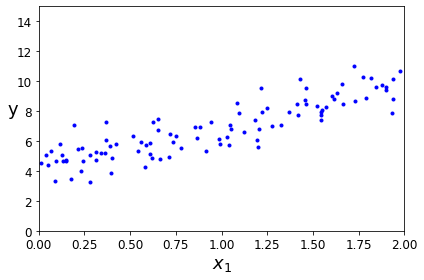

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# tracer le graphe
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([0, 2, 0 ,15])
save_fig("generated_data_plot")
plt.show()

Maintenant, on va calculer $\hat{\theta}$ en utilisant l'équation normale. Onva utiliser la fonction `inv()` du module d'algèrbe linéaire de NumPy (`np.linalg`) pour calculer l'inverse d'une matrice, et la méthode `dot()` pour la multiplication des matrices :

In [3]:
X_b = np.c_[np.ones((100,1)), X]    # ajoute x0 = 1 à chaque instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

La fonction qu'on a utilisé pour générer les données est $y = 4 + 3x_{i} + "bruit gaussien"$. Voyons voir ce que l'équation trouve :

In [4]:
theta_best

array([[4.21509616],
       [2.77011339]])

On aurait aimé trouver $\theta_{0}=4$ et $\theta_{1}=3$. On a un résultat assez proche mais le bruit rend impossible la découverte des paramètres exacts de la fonction d'origine.

Maintenant, on peut faire des prédictions en utilisant $\hat{\theta}$ :

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # ajoute x0 = 1 à chaque instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

On va maintenant tracer les prédictions du modèle :

Saving figure linear_model_predictions_plot


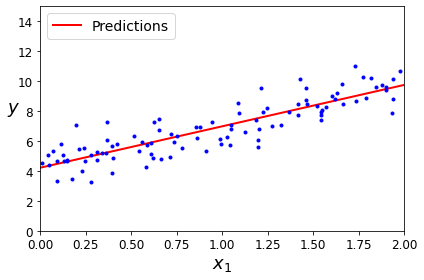

In [6]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

Réaliser une Régression Linéaire en utilisant Scikit-Learn est simple (à noter que sklearn sépare le terme de biais (`intercept_`) des poids des caractéristiques (*feature weights*)):

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

La classe `LinearRegression` est basée sur la fonction `scipy.linalg.lstsq()` (*least square*), qu'on peut appeler directement :

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

Cette fonction calcule $\hat{\theta} = X^{+}y$ où $X^{+}$ est le *pseudoinverse* de X (l'inverse de Moore-Penrose). On peut utiliser `np.linalg.pinv()` pour calculer le pseudoinverse directement :

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

Le pseudoinverse en lui-même est calculé à l'aide d'une technique de factorisation matricielle standard appelée SVD (*Standard Value Decomposition*) qui peut décomposer la matrice du JdE **X** en une matrice de multiplication de trois matrices $U \sum V^{⊺}$ (voir `numpy.linalg.svd()`).

Le pseudoinverse est calculé comme $X^{+} = \sum^{+}U^{⊺}$. Pour calculer la matrice **$\sum^{+}$**, l'algorithme prend **$\sum$** et mets à 0 toutes les valeurs plus petites qu'une minuscule valeur seuil, et remplace toutes les valeurs différentes de 0 par leur inverse, pour finalement les transpoer dans la matrice résultante.

Cette approche est plus efficace que de calculer l'équiation normale, et permet se charger des cas extrêmes d'une bonne manière : en effet, l'équation normale ne marche pas si la matrice $X^{⊺}X$ n'est pas inversible (c'est à dire singulière), comme si m < n ou si certaines caractéristiques (*features*) sont redondantes, mais que la pseudo-inverse est toujours définie.

### Complexité Computationnelle

L'équation normale caclue l'inverse de $X^{⊺}X$, qui est une matrice $(n+1)*(n+1)$ (où $n$ est le nombre de caractéristiques (*features*)). La *complexité computationnelle* de l'inversion d'une telle matrice est typiquement en $O(n^{2.4})$ ou $O(n^{3})$, dépendemment de l'implémentation. En d'autres termes, si on double le nombre de caractéristiques (*features*), on multiplie le temps de calcul par environ $2^{2.4} = 5.3$ à $2^{3} = 8$.

L'approche SVD utilisée par la classe `LinearRegression` de Scikit-Learn est en $O(n^{2})$. Si on double le nombre de caractéristiques (*features*), on multiplie le temps de calcul par 4.

*Attention* : aussi bien l'Équation Normale que l'approche SVD sont très lentes quand le nombre de caractéristiques (*features*) devient grand (environ 100 000). Mais elles sont toutes les deux linéaires en ce qui concerne le nombre d'instances du JdE ($O(m)$), donc elles prennent très bien en charge les grands JdE, à condition qu'on puisse les mettre en mémoire.

De plus, une fois qu'on a entraîné nos modèles de Régression Linéaire, les prédictions sont très rapides : la complexité computationnelle est linéaire aussi bien au regard du nombre d'instances qu'on veut prédire ainsi que le nombre de *features*.

On va maintenant s'intéresser à d'autres manières bien différentes d'entraîner un modèle de Régression Linéaire, qui seront plus adaptées pour des cas où on a un grand nombre de *features* ou trop d'instances d'entraînement pour rentrer en mémoire.

## Descente de gradient (*Gradient descent*)

La descente de gradient est un algorithme générique d'optimisation  capable de trouver des solutions optimales à un large champ de problèmes. L'idée générale est de modifier les paramètres de manière itérative afin de minimiser une fonction de coût.

Elle mesure le gradient local de la fonction d'erreur par rapport au vecteur paramètre $\theta$, et va dans le sens du gradient descendant. Une fois la pente nulle, on atteint un minimum.

Concrètement, on commence par remplir $\theta$ de valeurs aléatoires (c'est ce qu'on appelle l'*initialisation aléatoire* (*random initialization*)). Ensuite, on l'améliore graduellement, pas à pas, chaque pas essayant de réduire le coût de la fonction (ex : MSE), jusqu'à ce que l'algorithme *converge* vers un minimum.

Un paramètre important de la descente de gradient est la taille des pas, determinée par l'hyperparamètre *taux d'apprentissage* (*learning rate*). Si le taux d'apprentissage est trop petit, alors l'algo va devoir passer par de nombreuses itérations pour converger, ce qui prendra un certain temps.

Si le taux d'apprentissage est trop élevé, on peut "sauter" de l'autre côté, et même plus haut qu'avant. Cela va faire diverger l'algorithme, avec valeurs de plus en plus larges, l'empêchant de trouver une bonne solution.

Enfin, il faut savoir que toutes les fonctions ressemblent à un bol régulier. Il peut y avoir des trous, des crêtes, et des irrégularités, rendant la convergence vers le minimum difficile. On se retrouve parfois un minimum local qui empêche d'accéder au minimum global, en fonction de là où l'algo a commencé, ou encore avec des plateau qui font stagner la recherche.

Heureusement, la fonction de coût MSE pour une Régression Linéaire est une *fonction convexe*, ce qui veut dire que si on prend au hasard deux points dans la courbe, la ligne qui le rejoint ne va jamais croiser la courbe. Cela implique qu'il y a seulement un minimum global et pas de minimum local. C'est également une fonction avec une pente qui ne change jamais de manière abrupte. Ces deux faits ont une très bonne conséquence : la Descente de Gradient garanti qu'on va approcher arbitrairement du minimum global (si on attend suffisamment longtemps et si le taux d'apprentissage n'est pas trop élevé).

En fait, la fonction de coût a la forme d'un bol qui peut être allongé si les *features* ont des échelles très différentes, ce qui va faire que dans ce cas, il mettra beaucoup plus de temps à atteindre le minimum global. Quand on utilse la Descente de Gradient, il vaut mieux s'assurer qu'on a des *features* avec les mêmes échelles pour éviter ce problème.

Entraîner un modèle implique de chercher une combinaison de paramètres du modèle qui minimisent une fonction de coût (sur le JdE). C'est une recherche dans l'*espace des paramètres* : plus un modèle a de paramètres, plus l'espace a de dimensions, et plus dure est la recherche.

### Descente de gradient de lot (*Batch Gradient Descent*)

Pour implémenter la descente de gradient, on doit calculer le gradient de la fonction de coût pour chaque paramètre $\theta_{j}$ du modèle. Autrement dit, on doit calculer de combien va changer la fonction de cout si on change $\theta_{j}$ juste un peu. C'est ce qu'on appelle une *dérivée partielle*.

L'équation suivante calcule la dérivée partielle de la fonction de coût par rapport au paramètre $\theta_{j}$, noté $\partial MSE(\theta) / \partial{\theta_{j}}$ :

$$
\frac{\partial}{\partial{\theta_{j} }}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^{⊺}x^{(i)} - y^{(j)})x_{j}^{i}
$$

Au lieu de calculer ces dérivées partielles individuellement, on peut toutes les calculer d'un coup. Le vecteur gradiant, noté $∇_{\theta} MSE(\theta)$ contient toutes les dérivées partielles de la fonction de coût (une pour chaque paramètre du modèle).

Une fois qu'on a notre vecteur gradient, qui pointe en haut, il faut juste aller dans l'autre direction et aller vers le bas. Cela implique de soustraire $∇_{\theta} MSE(\theta)$ de $\theta$. C'est ici que le taux d'apprentissage $\eta$ rentre en jeu : multiplier le vecteur gradient par $\eta$ pour déterminer la taille du pas vers le bas.

Regardons l'implémentation de cet algorithme :

In [11]:
eta = 0.1   # taux d'apprentissage
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)   # initialisation aléatoire

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

In [12]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

On retrouve exactement le même résultat qu'avec l'Équation Normale. La descente de gradient a parfaitement fonctionné.

Mais que se serait-il passé si on avai utilisé un taux d'apprentissage $\eta$ différent ? Regardons pour trois *eta* différents (les lignes en pointillés représentent le point de départ):

In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0 ,15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


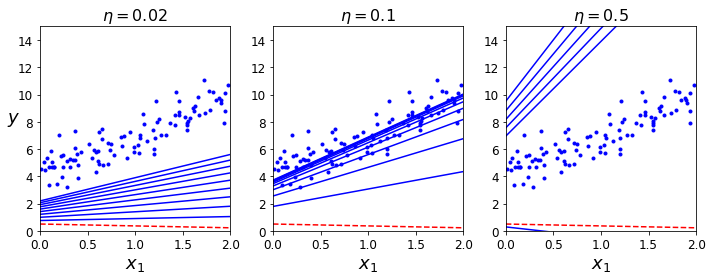

In [14]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

Sur la gauche, le taux d'apprentissage est trop bas : l'algo va finir par atteindre une solution, mais cela va prendre beaucoup de temps.

Au milieu, le taux d'apprentissage est très bon : en seulement quelques itérations, on converge déjà vers une solution.

À droite, le taux d'apprentissage est trop élevé : l'algo diverge, fait des "sauts" et s'éloigne de plus en plus de la solution à chaque pas.

Pour trouver le bon taux d'apprentissage, on peut utiliser la *grid search* (cf Ch2). Cependant, on peut vouloir limiter le nombre d'itérations pour que la *grid search* puisse éliminer les modèles qui vont mettre trop de temps à converger.

On peut se demander comment définir le nombre d'itérations. Si c'est trop bas, on risque de rester trop loin de la solution optimale quand l'algo s'arrête ; mais s'il est trop haut, on va perdre du temps alors que les paramètres du modèle ne changent plus. Une solution simple est de fixer un très grand nombre d'itération et d'interrompre l'algo quand le vecteur gradient (*gradient vector*) devient minuscule, c'est à dire quand sa norme devient inférieure à un très petit nombre $\epsilon$ appelé *tolérance*, parce que c'est ce qui se produit quand la Descente de gradient a (presque) atteint le minimum.

### Convergence Rate

Quand la fonction de coût est convexe et que sa pente ne change pas de manière abrupte (comme c'est le cas avec la fonction de coût MSE), le *batch gradient descent* avec un taux d'apprentissage fixe va finir par converger vers la solution optimale, mais cela peut prendre beaucoup de temps : ça peut prendre $O(1/\epsilon)$ itérations pour atteindre le point optimal dans une fourchette $\epsilon$, en fonction de la forme de la fonction de coût. Si on doit diviser la tolérance ($\epsilon$) par 10, pour avoir une solution plus précise, alors l'algorithme peut avoir à tourner 10 fois plus longtemps.


## Décente de gradient stochastique (*Stochastic gradient descent*)

Le problème principal avec la *batch gradient descent* est qu'elle utilise tout le JdE pour calculer les gradients à chaque étape, ce qui la rend très lente quand on a un gros JdE.

A l'opposé, la *sotchastic gradient descent* choisit aléatoirement une instance du JdE à chaque étape et calcule le gradient basé sur cette seule instance. Cela fait gagner énormément de temps parce que l'algo n'a a travailler qu'avec très peu de données à chaque itération. Cela permet aussi de travailler sur des très gros JdE, puisque seulement une seule instance a besoin d'être en mémoire à chaque itération (le SGD peut être implémenté comme un algo *out-of-core*).

D'un autre côté, à cause de sa nature stochastique (c'est-à-dire aléatoire), c'est algorithme est beaucoup moins régulier que le BGD : au lieu de décroître doucement jusqu'à ce qu'il atteigne le minimum, la fonction de coût va sauter de haut en bas, décroissement seulement en moyenne. Avec le temps, la fonction va finir par arriver vers le minimum, mais même à ce moment, elle va continuer à "sauter", sans jamais s'arrêter. Donc une fois que l'algo s'arrête, les valeurs des paramètres sont bonnes, mais pas optimales.

Quand la fonction de coût est très irrégulière, cela peut en fait aider l'algo à sortir des minima locaux, donc le SGD a une meilleure chance de trouver un minimum global que le BGD.

Ainsi, le hasard est une bonne chose pour échaper d'un optimal local, mais mauvais parce qu'il implique que l'algo ne peut jamais se stabiliser à un minimum. Une solution à ce problème est de graduellement réduire le taux d'apprentissage. Les pas commencent en étant grand (ce qui permet de faire des progrès rapides et d'échapper au minima locaux), puis deviennent de plus en plus petit, permettant à l'algo de se stabiliser au minimum global. Ce procédé est proche du *simulated annealing* (recuit simulé), un algo inspiré du recuit en métallurgie, où le métal en fusion est refroidi lentement. La fonction qui détermine le taux d'apprentissage à chaque itération est appelée *learning schedule*. Si le taux d'apprentissage est réduit trop rapidement, on peut se retrouver bloqué dans un minimum local, ou même bloqué à mi-chemin du minimum. Si le taux d'apprentissage est réduit trop lentement, on peut sauter autour du minimum pendant un long moment et se retrouver avec une solution sous optimale si on arrête l'entraînement trop tôt.

Le code suivant implémente une SGD utilisant une *learning schedule* simple. Par convention, on itère par tour de $m$ itérations, chaque tour étant appelé une *epoch*.

In [18]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


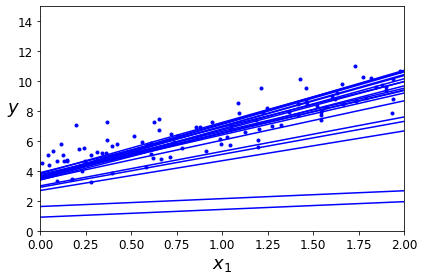

In [22]:
n_epochs = 50
t0, t1 = 5, 50  # hyperparamètres du learning schedule

def learning_schedule(t):
    return t0 / (t +t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

Le graphe ci-dessus montre les 20 premières étapes de l'entraînement ; notons l'irrégularité des étapes.

Alors que le code du BGD itérait 1000 fois sur tout le jeu d'entraînement, ce code ne passe par le jeu d'entraînement que 50 fois et atteint une très bonne solution.

In [20]:
theta

array([[4.21076011],
       [2.74856079]])

Comme les instance sont choisies aléatoirement, certaines instances peuvent être choisies plusieurs fois par *epoch*, alors que d'autres peuvent ne pas l'être du tout. Si on veut être sûr que l'algo passe par toutes les instances à chaque *epoch*, une autre approche est de mélanger le JdE (il faut s'assurer de mélanger la caractéristique d'entrée *input feature* et les labels conjointement), puis passer instance par instance, mélanger à nouveau, et ainsi de suite. Cepndant, cette approche à une convergence plus lente.

**Attention** : Quand on utilse une SGD, les instances d'entraînement doivent être indépendantes et identiquement distribuées (IID) pour s'assurer que les paramètres soient tirés vers l'optimum global en moyenne. Une manière simple de s'assurer cela est de mélanger les instances pendant l'entraînement, par exemple en choisissant une instance aléatoirement, ou en faisant un mélange sur le JdE au début de chaque *epoch*. Si on ne mélange pas les instances, par exemple si elles sont triées par label, alors le SGD va commencer par optimiser pour un label, puis le suivant, et ainsi de suite, et il ne va jamais se stabiliser proche du minimum global.

Pour faire une Régression Linéaire en utilisant le SGD avec Scikit-Learn, on peut utiliser la classe `SGDRegressor` qui par défaut optimise l'erreur au carré de la fonction de coût.

Le code suivant tourne pour un maximum de 1000 *epochs* ou jusqu'à ce que la perte tombe à moins de 0.001 pendant une *epoch* (`max_iter=100, tol=1e-3`). Il commence avec un taux d'apprentissage de 0.1 (`eta0=0.1`) en utilisant le *learning schedule* par défaut (différent de celui d'avant). Enfin, il n'ytilise aucune régularisation (`penalty=None`) :

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

Une fois de plus, on trouve une solution très porhce de celle retournée par l'Équation Normale :

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

## Mini-batch Gradient descent

Le dernier algo de GD qu'on va regarder est le *mini-batch gradient descent* (mBGD).

À chaque étape, au lieu de calculer le gradient en se basant sur tout le JdE (comme dans le BGD), ou seulement sur une instance (comme le SGD), le mBGD calcule les gradients sur un petit jeu d'instances aléatoires appelé *mini-batch*. L'avantage principal du mBGD sur le SGD est qu'on peut obtenir un boost des performance à partir d'optiisation hardware pour les opérations sur les matrices, particulièrement si on utilise les GPU.

La progression de l'algorithme dans le paramètre spacial est moins erratique qu'avec le SGD, particulièrement avec des mini-batches particulièrement gros. Résultat, la mBGD va terminer en tournant un peu plus proche du minimum que le SGD, mais ce sera peut-être plus dur pour lui de fuir les minima locaux (dans le cas de problèmes qui peuvent souffrir de minima locaux, ce qui n'est pas le cas de la régression linéaire).

In [28]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [30]:
theta

array([[4.25214635],
       [2.7896408 ]])

Regardons à présent les chemins pris par nos trois algo GD dans l'espace des paramètres durant l'entraînement :

In [31]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


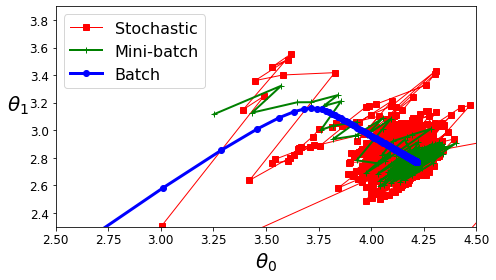

In [32]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

Les trois chemins finissent près du minium, mais BGD s'arrête au minimum, alors que SGQ et mBGD continuent tout les deux à tourner autour. Cependant, il ne faut pas oublier que la BGD prend beaucoup de temps à chaque étape, et que SGD et mBGD peuvent aussi atteindre le minimum si on utilise un bon *learning schedule*.

Comparons les algorithmes qu'on a vu pour la Régression Linéaire ($m$ est le nombre d'instances d'entraînement et $n$ le nombre de caractéristiques) :

| Algorithme       | m grand | Support OoC | n grand | Hp | scalling required | Scikit-Learn       |
|------------------|---------|-------------|---------|----|-------------------|--------------------|
| Équation normale | rapide  | non         | lent    | 0  | non               | N/A                |
| SVD              | rapide  | non         | lent    | 0  | non               | `LinearRegression` |
| BGD              | lent    | non         | rapide  | 2  | oui               | `SGDRegressor`     |
| SGD              | rapide  | oui         | rapide  | ≥2 | oui               | `SGDRegressor`     |
| mGD              | rapide  | oui         | rapide  | ≥2 | oui               | `SGDRegressor`     |


## Régression polynomiale (*Polynomial Regression*)

Et si nos données étaient plus complexes qu'une simple ligne ? Étrangement, on peut utiliser un modèle linéaire pour ajuster des données non linéaires. Une manière simple de faire ça est d'ajouter les puissances de chaque caractéristique comme de nouvelles caractéristiques, puis d'entraîner un modèle linéaire sur ce jeu de caractéristiques étendu. Cette technique est appelée la *Régression polynomiale*.

Exemple : d'abord, générons des données non-linéaires, basées sur une simple *équation quadratique* ($y = ax^{2} + bx + c$)  et du bruit :

In [33]:
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


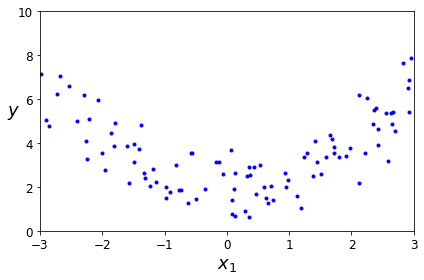

In [34]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

Une ligne droite ne s'ajustera jamais à ce genre de données. Donc nous allons utiliser la classe `PolynomialFeatures` de Scikit-Learn pour transformer nos données d'entraînement, ajouter le carré (second degré polynomial) de chaque caractérisitques dans le JdE en tant que nouvelle caractéristiques. 